该脚本探索使用 t_SNE 表示生成分子的多样性。它使用 RDKit 生成分子指纹，然后使用 scikit-learn 的 t_SNE 实现来降低指纹的维数。最后，它使用 matplotlib 绘制 t_SNE 降维的指纹。

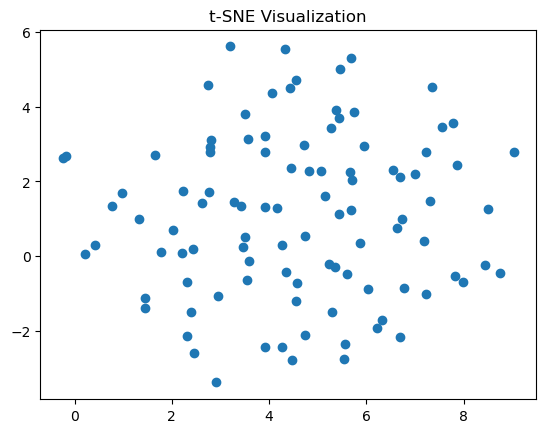

In [1]:
# 随机产生高维数据，使用 t-SNE 进行降维，并可视化低维数据
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 生成随机高维数据
np.random.seed(42)
data = np.random.randn(100, 10)

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
low_dimension = tsne.fit_transform(data)

# 可视化低维数据
plt.scatter(low_dimension[:, 0], low_dimension[:, 1])
plt.title('t-SNE Visualization')
plt.show()


In [9]:
data.shape

(100, 10)

如何计算1000个分子之间的平均Tanimoto距离，并使用t-SNE进行降维和可视化

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('../count_target/Linker_final.xlsx')
print(df.shape)
df.head(2)

(313, 34)


,num,pdb_structure,pdb_frag1,pdb_frag2,pdb_linker,pdb_atom_linker,pdb_bond_break,pdb_ID,pdb_chain,pdb_res_num,...,res_num,lig_ID,protein_uniport,activity,unit,activity_type,Changed_fragments,Fragment_similarity,pair,comment
0,1,O=C(C1CC2=C(C=C(OC3=CC=CC=C3)C=C2)CC1)C4=NC=C(...,[*]C(=O)c1ncc(-c2ccccn2)o1,[*]c1ccccc1,[*]C1CCc2cc(O[*])ccc2C1,13,"[1, 2],[8, 9]",3oj8,A,1,...,NaN,NaN,NaN,0.0047,μM,Ki,0.0,NaN,"12,2",NaN
1,2,CN1C=C(C2=CC=C(OC(C)C(NC3=NC(C4=CC=C(Br)C=C4)=...,[*]c1ccc(Br)cc1,[*]NC(=O)C(C)Oc1ccc(-c2cn(C)cn2)cc1,[*]c1nc([*])c[nH]1,7,"[12, 13],[15, 16]",5ou3,A,401,...,NaN,NaN,NaN,2.21,μM,IC50,0.0,NaN,"31,33","未采用Ki,使用IC50"


In [5]:
pdb_smiles = df['pdb_structure'].tolist()
smiles = df['structure'].tolist()
all_smiles = set(pdb_smiles).union(set(smiles))
len(all_smiles) # 371 个分子

371

In [7]:
all_smiles = list(all_smiles)
all_smiles[0]

'O=C(C=C(C1=C(N2C=C(Cl)N=N2)C=CC(Cl)=C1)CC3)N3[C@@H](CCC[C@@H](C)C4=O)C5=NC=CC(C6=C(N4)C=NN6C(F)F)=C5'

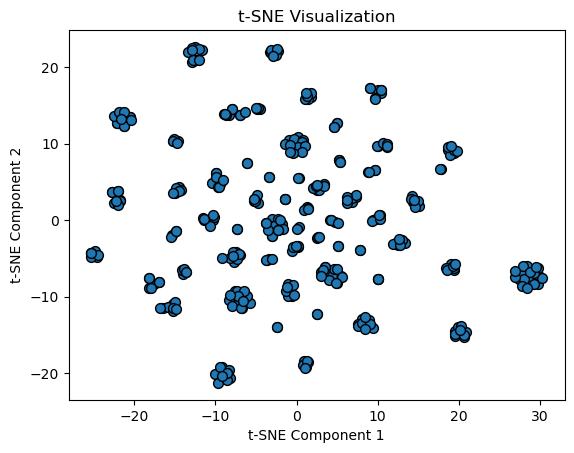

In [13]:
# 生成分子的ECFP指纹
def generate_fingerprint(smiles, radius=2, nBits=1024):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return np.array(fp)

# 计算所有分子对之间的Tanimoto距离
# def calculate_tanimoto_distance(fp_list):
#     distance_matrix = 1 - pairwise_distances(fp_list, metric="jaccard")
#     return distance_matrix

# 计算所有分子对之间的平均Tanimoto距离
# def calculate_average_tanimoto_distance(distance_matrix):
#     np.fill_diagonal(distance_matrix, 0)  # 将对角线元素设为0
#     avg_distance = np.mean(distance_matrix)
#     return avg_distance

# 使用t-SNE进行降维
def perform_tsne(fp_list, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_result = tsne.fit_transform(fp_list)
    return tsne_result

# 绘制t-SNE图
def plot_tsne(tsne_result):
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', edgecolors='k', s=50)
    plt.title('t-SNE Visualization')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# 生成分子的ECFP指纹
fp_list = [generate_fingerprint(smiles) for smiles in all_smiles]
fp_data = np.array(fp_list)
# 计算Tanimoto距离
# distance_matrix = calculate_tanimoto_distance(fp_list)

# 计算平均Tanimoto距离
# avg_tanimoto_distance = calculate_average_tanimoto_distance(distance_matrix)
# print(f"Average Tanimoto Distance: {avg_tanimoto_distance}")

# 使用t-SNE进行降维
tsne_result = perform_tsne(fp_data)

# 绘制t-SNE图
plot_tsne(tsne_result)


##### 绘制 linker 之间的 t-SNE 图

In [14]:
pdb_smiles = df['pdb_linker'].tolist()
smiles = df['linker'].tolist()
all_smiles = set(pdb_smiles).union(set(smiles))
len(all_smiles) # 371 个分子

351

In [15]:
all_smiles = list(all_smiles)
all_smiles[0]

'[*]c1[nH]nc([*])c1C'

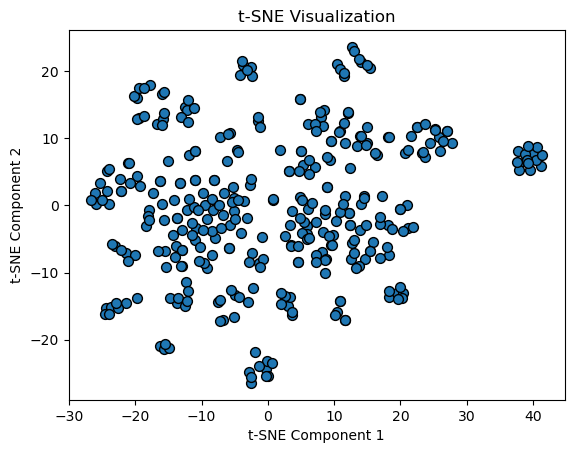

In [16]:
# 生成分子的ECFP指纹
def generate_fingerprint(smiles, radius=2, nBits=1024):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
    return np.array(fp)

# 使用t-SNE进行降维
def perform_tsne(fp_list, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_result = tsne.fit_transform(fp_list)
    return tsne_result

# 绘制t-SNE图
def plot_tsne(tsne_result):
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', edgecolors='k', s=50)
    plt.title('t-SNE Visualization')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# 生成分子的ECFP指纹
fp_list = [generate_fingerprint(smiles) for smiles in all_smiles]
fp_data = np.array(fp_list)

# 使用t-SNE进行降维
tsne_result = perform_tsne(fp_data)

# 绘制t-SNE图
plot_tsne(tsne_result)


c:\Users\17429\.conda\envs\3DLinker\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\17429\.conda\envs\3DLinker\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


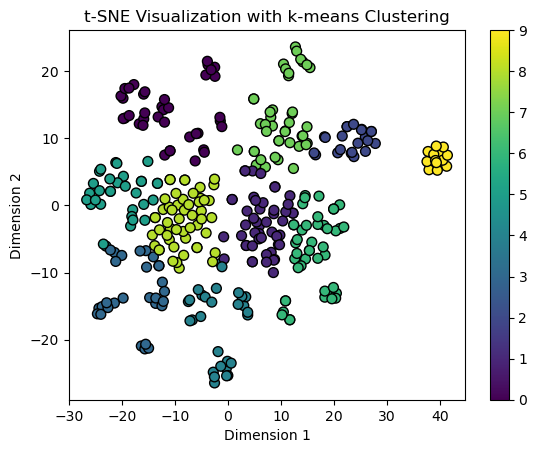

In [19]:
# 生成分子的ECFP指纹
fp_list = [generate_fingerprint(smiles) for smiles in all_smiles]
fp_data = np.array(fp_list)

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
low_dimension = tsne.fit_transform(fp_data)

# 使用 k-means 聚类
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(low_dimension)

# 绘制 t-SNE 的散点图，并按照 k-means 的聚类结果着色
plt.scatter(low_dimension[:, 0], low_dimension[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization with k-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()

c:\Users\17429\.conda\envs\3DLinker\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\17429\.conda\envs\3DLinker\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


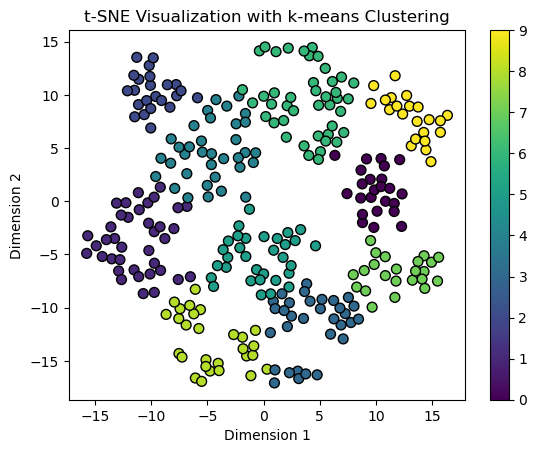

In [18]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 生成随机高维数据
np.random.seed(42)
data = np.random.randn(300, 2)

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
low_dimension = tsne.fit_transform(data)

# 使用 k-means 聚类
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(low_dimension)

# 绘制 t-SNE 的散点图，并按照 k-means 的聚类结果着色
plt.scatter(low_dimension[:, 0], low_dimension[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization with k-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()
